# Step 3: Load and Segment Text

In [1]:
from modules.utils import load_and_segment_texts

# Load and segment texts
input_clean_folder = 'text-data-clean'
segmented_texts = load_and_segment_texts(input_clean_folder)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harry\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
segmented_texts

{'Annisa Lyanzahra Utomo_Uji Kualifikasi.txt': [' optimisasi ekstraksi informasi dalam model rag untuk analisis dialog konseling.',
  'bab 1 pendahuluan 1.1 latar belakang perkembangan teknologi kecerdasan artifisal ai telah membawa perubahan signifikan dalam berbagai bidang termasuk bidang psikologi.',
  'dalam beberapa dekade terakhir bidang psikologi telah berkembang pesat dengan munculnya pendekatan dan metode baru untuk memahami perilaku dan kondisi mental manusia kazdin .',
  'konseling merupakan sebuah hubungan kolaboratif antara konselor profesional dengan individu keluarga atau kelompok.',
  'tujuan utama konseling adalah memberdayakan klien untuk mencapai kesehatan mental kesejahteraan serta keberhasilan dalam pendidikan dan karir.',
  'bagi mereka yang mengalami kesulitan psikologis atau interpersonal konseling kesehatan mental menjadi intervensi utama yang membantu.',
  'sesi konseling menerapkan pendekatan berpusat pada klien menciptakan lingkungan yang aman dan suportif u

# Step 4: Feature Extraction

In [3]:
import numpy as np
from modules.utils import categorize_and_extract_features

# Define a list of unimportant words
unimportant_words = ["contohnya", "sebagai contoh", "contoh", "misalnya", "misal", "misalkan"]

# Define title words for each document (assuming files are named doc1.txt, doc2.txt, ..., doc10.txt)
title_words_mapping = {
    'Annisa Lyanzahra Utomo_Uji Kualifikasi.txt': ['optimisasi', 'ekstraksi', 'informasi', 'model', 'rag', 'analisis', 'dialog', 'konseling'],
    'Ike Putri Kusumawijaya (99216004).txt': ['pengembangan', 'metode', 'identifikasi', 'pergerakan', 'anomali', 'kerumunan', 'generatif'],
    'Indah Wahyuningsih_Kualifikasi.txt': ['pengembangan', 'machine', 'learning', 'framework', 'vibration', 'analyzer', 'rotating', 'machinery', 'internet', 'things'],
    'Kualifikasi Makmun.txt': ['pengembangan', 'algoritma', 'enkripsi', 'citra', 'digital', 'komposisi', 'logistic', 'map', 'circle'],
    'Kualifikasi_Rama Dian Syah.txt': ['pengembangan', 'kriptografi', 'citra', 'digital', 'chaotic', 'map'],
    'KUALIFIKASI_Riya Widayanti.txt': ['penerapan', 'teknologi', 'blockchain', 'tata', 'kelola', 'data', 'pendidikan', 'tinggi'],
    'Kualifikasi_Suhartini__99220710.txt': ['pengenalan', 'biji', 'kopi', 'arabika', 'menggunakan', 'computer', 'vision', 'klasifikasi', 'varietas', 'kopi', 'arabika', 'indonesia'],
    'MetaMeysawati (99216026).txt': ['klasifikasi', 'genre', 'film', 'indonesia', 'cuplikan', 'menggunakan', 'metode', 'support', 'vector', 'machine', 'svm'],
    'Miftakhul Zaen_KUALIFIKASI.txt': ['pengembangan', 'algoritma', 'kuantum', 'dbscan', 'klasterisasi', 'supplier'],
    'yohanes kurnia_UK.txt': ['sistem', 'deteksi', 'cerdas', 'suara', 'jantung', 'penyakit', 'gagal', 'katup', 'jantung']
}

# Define cue words and title words for testing
cue_words = ["menghasilkan", "sebagai hasilnya", "membuat", "mewujudkan",
             "sebagai kesimpulan", "mengembangkan", "menciptakan", "membangun",
             "menyusun", "melahirkan", "meningkatkan", "merancang", "menyempurnakan"]

In [4]:
categorized_texts_with_features = categorize_and_extract_features(segmented_texts, title_words_mapping, cue_words)

# Print output for the first document for demonstration
for file_name, categories in categorized_texts_with_features.items():
    if file_name == "yohanes kurnia_UK.txt":
        print(f"File: {file_name}")
        print("Title:", categories['title'])
        print()
        print("Latar Belakang:", categories['latar_belakang'][:2])  # Print first 2 sentences with features for demonstration
        print()
        print("Tujuan:", categories['tujuan'][:2])
        print()
        print("Metode:", categories['metode'][:2])
        break  # Print for the first file only for demonstration

File: yohanes kurnia_UK.txt
Title: [{'sentence': ' sistem deteksi cerdas suara pada jantung untuk penyakit gagal katup jantung.', 'features': {'unimportant': 1, 'length': 11, 'words_in_title': 0.7272727272727273, 'position': 1, 'cue_words': 0.0}}]

Latar Belakang: [{'sentence': '1.1. latar belakang 2banyak penyakit jantung dapat dikenali pada tahap awal dengan menggunakan pemeriksaan suara jantung dan dengan demikian dapat ditangani lebih awal.', 'features': {'unimportant': 1, 'length': 23, 'words_in_title': 0.12, 'position': 0.02409638554216864, 'cue_words': 0.0}}, {'sentence': 'pola mendengarkan sistem kardiovaskular diagnos a ausk ultasi dapat membantu dalam diagnosis tepat waktu penyakit katup jantung vhd gagal jantung congestive penyakit hipertensi aritmia seperti fibrilasi atrium penyakit arteri obstruktif dan penyakit jantung struktural di antara lainnya.', 'features': {'unimportant': 1, 'length': 37, 'words_in_title': 0.14285714285714285, 'position': 0.048192771084337394, 'cue_

In [5]:
categorized_texts_with_features

{'Annisa Lyanzahra Utomo_Uji Kualifikasi.txt': {'title': [{'sentence': ' optimisasi ekstraksi informasi dalam model rag untuk analisis dialog konseling.',
    'features': {'unimportant': 1,
     'length': 10,
     'words_in_title': 0.6363636363636364,
     'position': 1,
     'cue_words': 0.0}}],
  'latar_belakang': [{'sentence': 'bab 1 pendahuluan 1.1 latar belakang perkembangan teknologi kecerdasan artifisal ai telah membawa perubahan signifikan dalam berbagai bidang termasuk bidang psikologi.',
    'features': {'unimportant': 1,
     'length': 21,
     'words_in_title': 0.0,
     'position': 0.0625,
     'cue_words': 0.0}},
   {'sentence': 'dalam beberapa dekade terakhir bidang psikologi telah berkembang pesat dengan munculnya pendekatan dan metode baru untuk memahami perilaku dan kondisi mental manusia kazdin .',
    'features': {'unimportant': 1,
     'length': 24,
     'words_in_title': 0.0,
     'position': 0.125,
     'cue_words': 0.0}},
   {'sentence': 'konseling merupakan seb

# Step 6: Summarization

## Standard for Text Summarization

In [6]:
from modules.utils import summarize_text

summaries = summarize_text(categorized_texts_with_features)

for file_name, summary in summaries.items():
    if file_name == "yohanes kurnia_UK.txt":
        print(f"File: {file_name}")
        print(f"Judul: {summary['judul']}\n")
        print("LATAR BELAKANG:")
        for sentence in summary['latar_belakang']:
            print(f"- {sentence}")
        print("\nTUJUAN:")
        for sentence in summary['tujuan']:
            print(f"- {sentence}")
        print("\nMETODE:")
        for sentence in summary['metode']:
            print(f"- {sentence}")
        print("\n")

File: yohanes kurnia_UK.txt
Judul:  sistem deteksi cerdas suara pada jantung untuk penyakit gagal katup jantung.

LATAR BELAKANG:
- pada suara keempat s4 berhubungan dengan gagal jantung pada periode diastolik.
- pembukaan katup jantung biasanya tidak menghasilkan suara.
- ketika gagal jantung terdeteksi s3 dapat dirujuk sebagai gejala ekstrapolatif yang buruk.
- penulis berusaha untuk mensistematiskan rekomendasi mengenai konstruksi sistem digital yang harus diperhatikan untuk mencapai rekaman dan pemrosesan suara jantung berkualitas tinggi.
- bunyi jantung keempat s4 terjadi pada akhir diastol yang mer upakan suara bernada rendah dan dapat ditandai dengan baik oleh bel dari stetoskop.
- bunyi jantung ke empat s4 tidak terlihat selama fibrilasi atrium atau flutter .
- aktivitas penutupan katup jantung yang menghasilkan suara jantung normal penutupan katup mitral dan trikuspid menghasilkan bunyi jantung pertama s1 dan penutupan katup aorta dan pulmonal menghasilkan bunyi jantung kedua 

In [7]:
summaries

{'Annisa Lyanzahra Utomo_Uji Kualifikasi.txt': {'judul': ' optimisasi ekstraksi informasi dalam model rag untuk analisis dialog konseling.',
  'latar_belakang': ['201 9 telah mengeksplorasi penggunaan llm untuk menganalisis transkrip wawancara pasien namun terbatas pada identifikasi gejala dan diagnosis.',
   'sesi konseling menerapkan pendekatan berpusat pada klien menciptakan lingkungan yang aman dan suportif untuk memb angun kepercayaan dan eksplorasi diri.',
   '2019 rae et al.',
   'namun salah satu tantangan utama yang masih dihadapi oleh para konsel or dan peneliti psikologi adalah menganalisis dan mengekstraksi informasi penting dari percakapan dengan klien.',
   'percakapan ini seringkali panjang kompleks dan mengandung banyak informasi tersembunyi yang sulit untuk diidentifikasi secara manual dan proses analisis secara manual seringkali memakan waktu dan rentan terhadap bias subjektif.',
   'imel steyvers and atkins 2015. teknologi ai telah muncul sebagai alat yang berpotensi

# Step 7: Correlation Analysis

## LDA Topic Modeling

File: yohanes kurnia_UK.txt
Topic 0: 0.023*"suara" + 0.021*"jantung" + 0.016*"sinyal" + 0.011*"digital" + 0.010*"stetoskop" + 0.007*"penyakit" + 0.006*"rendah" + 0.006*"sistem" + 0.006*"metode" + 0.006*"diagnosis"
Topic 1: 0.045*"jantung" + 0.040*"suara" + 0.019*"sinyal" + 0.012*"stetoskop" + 0.010*"sistem" + 0.010*"digital" + 0.007*"normal" + 0.007*"metode" + 0.006*"rendah" + 0.006*"diagnosis"
Topic 2: 0.023*"jantung" + 0.019*"sinyal" + 0.017*"suara" + 0.011*"stetoskop" + 0.008*"digital" + 0.008*"sistem" + 0.006*"diagnosis" + 0.006*"penyakit" + 0.006*"auskultasi" + 0.006*"rendah"



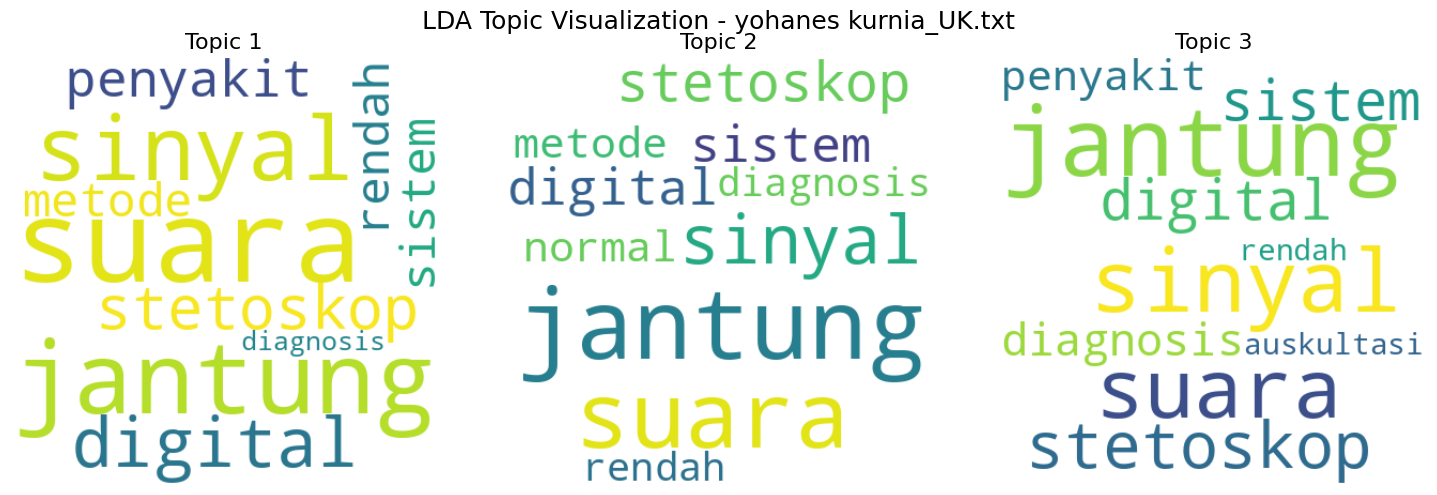

In [8]:
from modules.utils import lda_topic_modeling, plot_lda_wordcloud_for_file

lda_topics = lda_topic_modeling(categorized_texts_with_features)

for file_name, topics in lda_topics.items():
    if file_name == "yohanes kurnia_UK.txt":
        print(f"File: {file_name}")
        for topic_id, topic in topics:
            print(f"Topic {topic_id}: {topic}")
        print()
plot_lda_wordcloud_for_file(lda_topics)


## Cosine Similarity

File: yohanes kurnia_UK.txt
Latar Belakang vs Tujuan: 0.5494
Latar Belakang vs Metode: 0.5873
Tujuan vs Metode: 0.4457



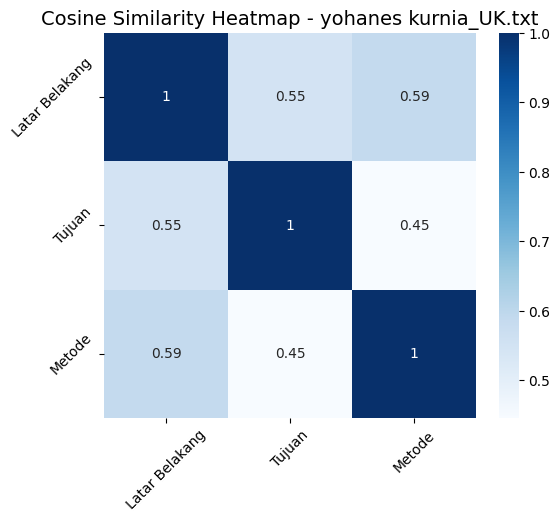

In [9]:
from modules.utils import cosine_similarity_analysis, plot_cosine_similarity_for_file

similarities = cosine_similarity_analysis(categorized_texts_with_features)

for file_name, sim_values in similarities.items():
    if file_name == "yohanes kurnia_UK.txt":
        print(f"File: {file_name}")
        print(f"Latar Belakang vs Tujuan: {sim_values['latar_belakang_vs_tujuan']:.4f}")
        print(f"Latar Belakang vs Metode: {sim_values['latar_belakang_vs_metode']:.4f}")
        print(f"Tujuan vs Metode: {sim_values['tujuan_vs_metode']:.4f}")
        print()
        
plot_cosine_similarity_for_file(similarities)

### Kategori Korelasi
Proposal Kualifikasi dalam Kategori :
- Lemah (0.00 - 0.30)
- Sedang (0.31 - 0.60)
- Kuat (0.61 - 1.00)

novelty proposal : jawaban ada atau tidak ada

Rekomendasi layak (minimal sedang, novelty ada)
tidak layak (novelty tidak ada)

fitur kalimat dan bert